<a href="https://colab.research.google.com/github/pennya6/CJ_project/blob/main/%EA%B2%80%EC%83%89%EB%9F%89%EC%B6%94%EC%9D%B4_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
top10=pd.read_csv("/content/drive/Shareddrives/2021 CJ 대한통운 공모전/data/crawling_data/top10/TOP10.csv")

In [4]:
top10

,Unnamed: 0,순위,가구,디지털,면세점,생활건강,스포츠레저,식품,여가생활편의,패션잡화,패션의류,출산육아,화장품미용
0,0,1,책상,마우스,불리목욕하는여인,마스크,여성골프웨어,닭가슴살,제주렌트카,나이키데이브레이크,원피스,크록스키즈,바디미스트
1,1,2,화장대,무선키보드세트,아크메드라비반팔,kf94마스크,등산화,미역국수,문화상품권,나이키운동화,트위드자켓,키즈경량패딩,가히멀티밤
2,2,3,행거,닌텐도스위치,널디후드집업,스타벅스텀블러,k2플라이하이크,오메가3,제주도렌트카,크록스,트렌치코트,키즈바람막이,헤라블랙쿠션
3,3,4,쇼파,에어팟프로,백아율오리진크림,와플팬,캠핑의자,쌀20kg,꽃배달,운동화,나이키바람막이,키즈운동화,인셀덤
4,4,5,침대,공기청정기,육심원가방,kf94마스크새부리형,자전거,콤부차,캠핑카렌트,뉴발란스327,블라우스,베베드피노,ahc아이크림
5,5,6,컴퓨터책상,냉장고,키엘오리지널머스크블랜드,텀블러,전기자전거,생수,신세계상품권,나이키에어맥스97,바람막이,아디다스키즈운동화,닥터지선크림
6,6,7,전신거울,노트북,미니멜리사190,마스크스트랩,텐트,그릭요거트,제주도항공권,슬리퍼,후드집업,뉴발란스키즈,피지오겔페이셜크림
7,7,8,책장,다이슨에어랩,양키캔들그린하우스,화분,캠핑테이블,유산균,머지포인트,아디다스운동화,여자트렌치코트,나이키키즈운동화,피지오겔
8,8,9,앞치마,에어프라이어,휘게릴리프선모이스처라이저,전자담배,캠핑용품,콜라겐,구글기프트카드,뉴발란스530,롱원피스,미니멜리사,헤어에센스
9,9,10,식탁의자,전자레인지,샬랑드파리쿠션,빨래건조대,차박텐트,햇반,생화,카드지갑,여성트레이닝세트,휠라키즈운동화,선크림


In [5]:
top10=top10.drop('Unnamed: 0',axis=1)

In [6]:
import os
import sys
import urllib.request
import json
import pandas as pd

In [7]:
client_id="l54OU3RyAxGlGgRaggwl"
client_secret="rMEF6wnAEF"


In [8]:
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-03-07\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}]}";

In [21]:
import matplotlib.pyplot as plt

In [50]:
top10.loc[3:3,'가구']

3    쇼파
Name: 가구, dtype: object

In [51]:
def find_top10_ratio(topic):
  #topic 넣어주면 알아서 가져오기
  url = "https://openapi.naver.com/v1/datalab/search";
 
  for i in range(len(top10[topic])):

     body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-03-08\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}]}";
     json_body=json.loads(body)

     for keyword in json_body['keywordGroups']:
          keyword['groupName']=top10[topic][i]
          keyword['keywords']=list(top10.loc[i:i,topic])

          body=json.dumps(json_body,ensure_ascii=False)
          body=str(body)

          request = urllib.request.Request(url)
          request.add_header("X-Naver-Client-Id",client_id)
          request.add_header("X-Naver-Client-Secret",client_secret)
          request.add_header("Content-Type","application/json")
          response = urllib.request.urlopen(request, data=body.encode("utf-8"))
          rescode = response.getcode()

          if(rescode==200):
              response_body = response.read()
              output_data=response_body.decode('utf-8')
          else:
              print("Error Code:" + rescode)

          result=json.loads(output_data)
          print(result)

          date = [a['period'] for a in result['results'][0]['data']]
          ratio = [a['ratio'] for a in result['results'][0]['data']]

          new=pd.DataFrame({'date':date, 'output':ratio})
         # print(new)   
          plt.plot(new.index,new['output'])

          for x,y in enumerate(list(new['output'])):
              plt.text(x,y,y,fontsize=10,color="#ff0000",horizontalalignment='center',verticalalignment='bottom')
          plt.show()
       
    



{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '책상', 'keywords': ['책상'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 80.61901}, {'period': '2021-03-03', 'ratio': 72.59395}, {'period': '2021-03-04', 'ratio': 68.14296}, {'period': '2021-03-05', 'ratio': 58.48931}, {'period': '2021-03-06', 'ratio': 70.71481}, {'period': '2021-03-07', 'ratio': 84.34045}, {'period': '2021-03-08', 'ratio': 74.11938}]}]}


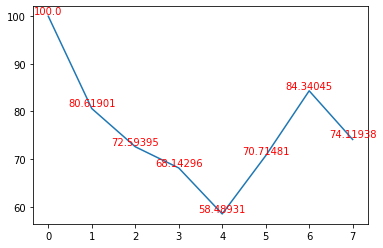

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '화장대', 'keywords': ['화장대'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 71.87987}, {'period': '2021-03-03', 'ratio': 63.06552}, {'period': '2021-03-04', 'ratio': 63.01352}, {'period': '2021-03-05', 'ratio': 54.38117}, {'period': '2021-03-06', 'ratio': 70.83983}, {'period': '2021-03-07', 'ratio': 88.55954}, {'period': '2021-03-08', 'ratio': 73.33593}]}]}


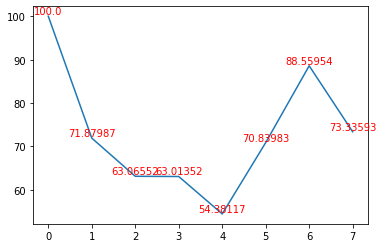

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '행거', 'keywords': ['행거'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 81.55149}, {'period': '2021-03-03', 'ratio': 73.21816}, {'period': '2021-03-04', 'ratio': 69.20903}, {'period': '2021-03-05', 'ratio': 61.53846}, {'period': '2021-03-06', 'ratio': 70.58887}, {'period': '2021-03-07', 'ratio': 92.00347}, {'period': '2021-03-08', 'ratio': 75.71707}]}]}


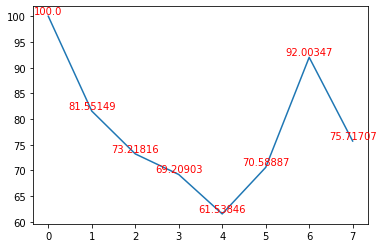

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '쇼파', 'keywords': ['쇼파'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 70.92515}, {'period': '2021-03-03', 'ratio': 65.90995}, {'period': '2021-03-04', 'ratio': 65.53001}, {'period': '2021-03-05', 'ratio': 57.96922}, {'period': '2021-03-06', 'ratio': 77.95402}, {'period': '2021-03-07', 'ratio': 92.4962}, {'period': '2021-03-08', 'ratio': 69.12993}]}]}


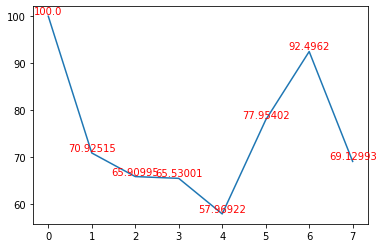

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '침대', 'keywords': ['침대'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 74.88418}, {'period': '2021-03-03', 'ratio': 68.29194}, {'period': '2021-03-04', 'ratio': 67.10716}, {'period': '2021-03-05', 'ratio': 58.98838}, {'period': '2021-03-06', 'ratio': 80.23088}, {'period': '2021-03-07', 'ratio': 90.39264}, {'period': '2021-03-08', 'ratio': 73.62345}]}]}


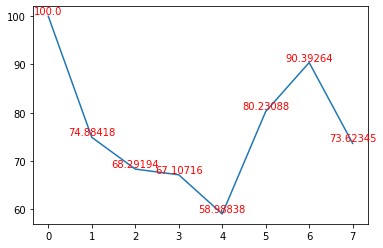

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '컴퓨터책상', 'keywords': ['컴퓨터책상'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 83.21737}, {'period': '2021-03-03', 'ratio': 75.90515}, {'period': '2021-03-04', 'ratio': 74.71248}, {'period': '2021-03-05', 'ratio': 65.12849}, {'period': '2021-03-06', 'ratio': 72.18514}, {'period': '2021-03-07', 'ratio': 86.767}, {'period': '2021-03-08', 'ratio': 83.21737}]}]}


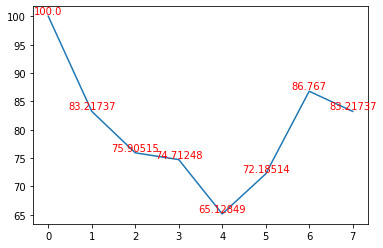

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '전신거울', 'keywords': ['전신거울'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 80.79161}, {'period': '2021-03-03', 'ratio': 70.29768}, {'period': '2021-03-04', 'ratio': 68.76767}, {'period': '2021-03-05', 'ratio': 61.59986}, {'period': '2021-03-06', 'ratio': 74.3223}, {'period': '2021-03-07', 'ratio': 92.68252}, {'period': '2021-03-08', 'ratio': 79.01214}]}]}


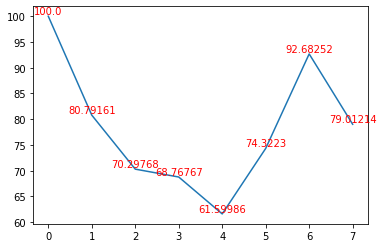

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '책장', 'keywords': ['책장'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 74.63601}, {'period': '2021-03-03', 'ratio': 68.45466}, {'period': '2021-03-04', 'ratio': 65.56832}, {'period': '2021-03-05', 'ratio': 59.80842}, {'period': '2021-03-06', 'ratio': 71.14942}, {'period': '2021-03-07', 'ratio': 88.97828}, {'period': '2021-03-08', 'ratio': 75.78544}]}]}


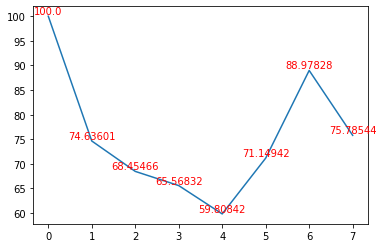

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '앞치마', 'keywords': ['앞치마'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 93.9417}, {'period': '2021-03-03', 'ratio': 91.42693}, {'period': '2021-03-04', 'ratio': 97.48523}, {'period': '2021-03-05', 'ratio': 83.46351}, {'period': '2021-03-06', 'ratio': 90.28386}, {'period': '2021-03-07', 'ratio': 96.3231}, {'period': '2021-03-08', 'ratio': 98.66641}]}]}


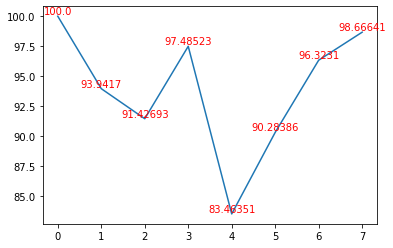

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '식탁의자', 'keywords': ['식탁의자'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 75.34591}, {'period': '2021-03-03', 'ratio': 64.3486}, {'period': '2021-03-04', 'ratio': 65.89398}, {'period': '2021-03-05', 'ratio': 56.29829}, {'period': '2021-03-06', 'ratio': 74.8787}, {'period': '2021-03-07', 'ratio': 91.50044}, {'period': '2021-03-08', 'ratio': 76.78346}]}]}


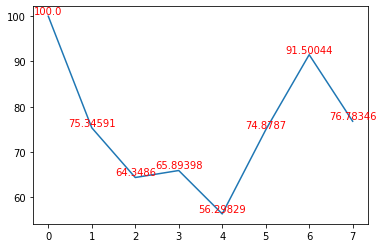

In [52]:
find_top10_ratio('가구')

In [29]:
top10.columns[1]

'가구'

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '책상', 'keywords': ['책상'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 80.61901}, {'period': '2021-03-03', 'ratio': 72.59395}, {'period': '2021-03-04', 'ratio': 68.14296}, {'period': '2021-03-05', 'ratio': 58.48931}, {'period': '2021-03-06', 'ratio': 70.71481}, {'period': '2021-03-07', 'ratio': 84.34045}, {'period': '2021-03-08', 'ratio': 74.11938}]}]}


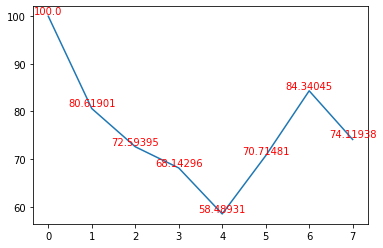

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '화장대', 'keywords': ['화장대'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 71.87987}, {'period': '2021-03-03', 'ratio': 63.06552}, {'period': '2021-03-04', 'ratio': 63.01352}, {'period': '2021-03-05', 'ratio': 54.38117}, {'period': '2021-03-06', 'ratio': 70.83983}, {'period': '2021-03-07', 'ratio': 88.55954}, {'period': '2021-03-08', 'ratio': 73.33593}]}]}


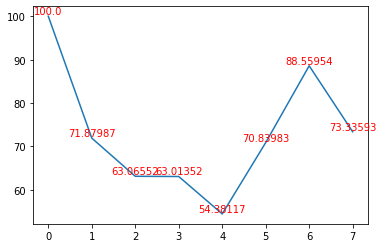

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '행거', 'keywords': ['행거'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 81.55149}, {'period': '2021-03-03', 'ratio': 73.21816}, {'period': '2021-03-04', 'ratio': 69.20903}, {'period': '2021-03-05', 'ratio': 61.53846}, {'period': '2021-03-06', 'ratio': 70.58887}, {'period': '2021-03-07', 'ratio': 92.00347}, {'period': '2021-03-08', 'ratio': 75.71707}]}]}


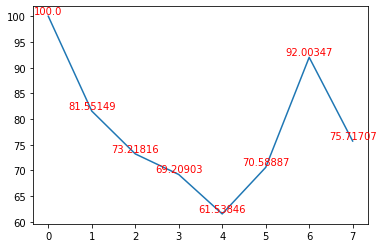

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '쇼파', 'keywords': ['쇼파'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 70.92515}, {'period': '2021-03-03', 'ratio': 65.90995}, {'period': '2021-03-04', 'ratio': 65.53001}, {'period': '2021-03-05', 'ratio': 57.96922}, {'period': '2021-03-06', 'ratio': 77.95402}, {'period': '2021-03-07', 'ratio': 92.4962}, {'period': '2021-03-08', 'ratio': 69.12993}]}]}


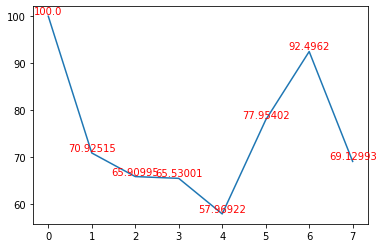

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '침대', 'keywords': ['침대'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 74.88418}, {'period': '2021-03-03', 'ratio': 68.29194}, {'period': '2021-03-04', 'ratio': 67.10716}, {'period': '2021-03-05', 'ratio': 58.98838}, {'period': '2021-03-06', 'ratio': 80.23088}, {'period': '2021-03-07', 'ratio': 90.39264}, {'period': '2021-03-08', 'ratio': 73.62345}]}]}


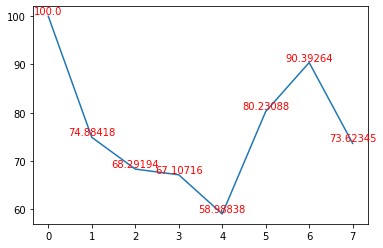

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '컴퓨터책상', 'keywords': ['컴퓨터책상'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 83.21737}, {'period': '2021-03-03', 'ratio': 75.90515}, {'period': '2021-03-04', 'ratio': 74.71248}, {'period': '2021-03-05', 'ratio': 65.12849}, {'period': '2021-03-06', 'ratio': 72.18514}, {'period': '2021-03-07', 'ratio': 86.767}, {'period': '2021-03-08', 'ratio': 83.21737}]}]}


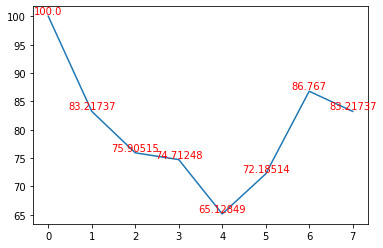

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '전신거울', 'keywords': ['전신거울'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 80.79161}, {'period': '2021-03-03', 'ratio': 70.29768}, {'period': '2021-03-04', 'ratio': 68.76767}, {'period': '2021-03-05', 'ratio': 61.59986}, {'period': '2021-03-06', 'ratio': 74.3223}, {'period': '2021-03-07', 'ratio': 92.68252}, {'period': '2021-03-08', 'ratio': 79.01214}]}]}


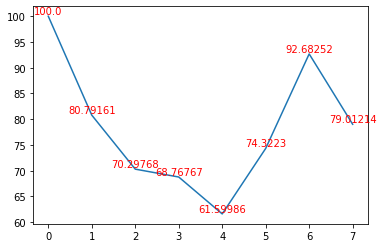

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '책장', 'keywords': ['책장'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 74.63601}, {'period': '2021-03-03', 'ratio': 68.45466}, {'period': '2021-03-04', 'ratio': 65.56832}, {'period': '2021-03-05', 'ratio': 59.80842}, {'period': '2021-03-06', 'ratio': 71.14942}, {'period': '2021-03-07', 'ratio': 88.97828}, {'period': '2021-03-08', 'ratio': 75.78544}]}]}


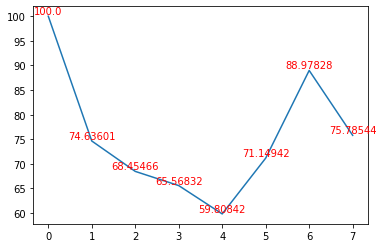

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '앞치마', 'keywords': ['앞치마'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 93.9417}, {'period': '2021-03-03', 'ratio': 91.42693}, {'period': '2021-03-04', 'ratio': 97.48523}, {'period': '2021-03-05', 'ratio': 83.46351}, {'period': '2021-03-06', 'ratio': 90.28386}, {'period': '2021-03-07', 'ratio': 96.3231}, {'period': '2021-03-08', 'ratio': 98.66641}]}]}


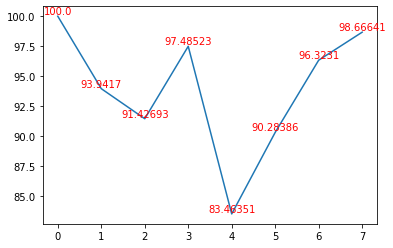

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '식탁의자', 'keywords': ['식탁의자'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 75.34591}, {'period': '2021-03-03', 'ratio': 64.3486}, {'period': '2021-03-04', 'ratio': 65.89398}, {'period': '2021-03-05', 'ratio': 56.29829}, {'period': '2021-03-06', 'ratio': 74.8787}, {'period': '2021-03-07', 'ratio': 91.50044}, {'period': '2021-03-08', 'ratio': 76.78346}]}]}


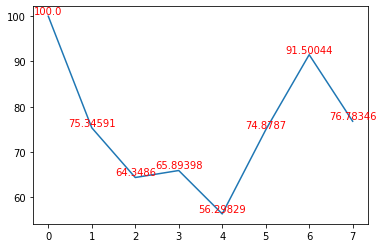

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '마우스', 'keywords': ['마우스'], 'data': [{'period': '2021-03-01', 'ratio': 2.34362}, {'period': '2021-03-02', 'ratio': 2.6218}, {'period': '2021-03-03', 'ratio': 59.09727}, {'period': '2021-03-04', 'ratio': 100}, {'period': '2021-03-05', 'ratio': 59.31406}, {'period': '2021-03-06', 'ratio': 25.7429}, {'period': '2021-03-07', 'ratio': 26.57396}, {'period': '2021-03-08', 'ratio': 25.16645}]}]}


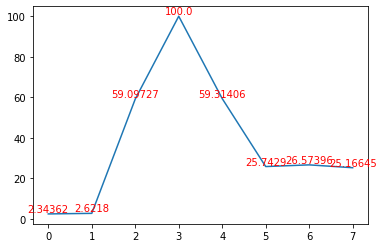

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '무선키보드세트', 'keywords': ['무선키보드세트'], 'data': [{'period': '2021-03-01', 'ratio': 47.61904}, {'period': '2021-03-02', 'ratio': 85.71428}, {'period': '2021-03-03', 'ratio': 80.95238}, {'period': '2021-03-04', 'ratio': 92.85714}, {'period': '2021-03-05', 'ratio': 100}, {'period': '2021-03-06', 'ratio': 64.28571}, {'period': '2021-03-07', 'ratio': 52.38095}, {'period': '2021-03-08', 'ratio': 85.71428}]}]}


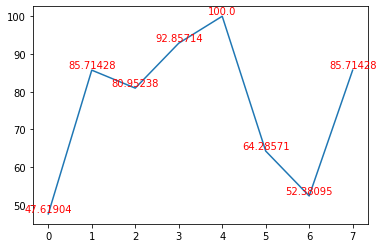

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '닌텐도스위치', 'keywords': ['닌텐도스위치'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 75.20158}, {'period': '2021-03-03', 'ratio': 66.57985}, {'period': '2021-03-04', 'ratio': 66.94045}, {'period': '2021-03-05', 'ratio': 66.87534}, {'period': '2021-03-06', 'ratio': 83.4602}, {'period': '2021-03-07', 'ratio': 82.86422}, {'period': '2021-03-08', 'ratio': 65.80858}]}]}


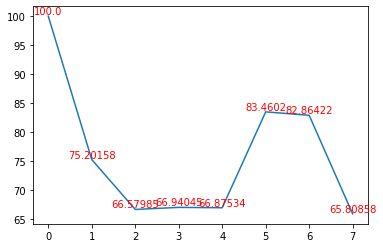

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '에어팟프로', 'keywords': ['에어팟프로'], 'data': [{'period': '2021-03-01', 'ratio': 95.86167}, {'period': '2021-03-02', 'ratio': 97.05095}, {'period': '2021-03-03', 'ratio': 100}, {'period': '2021-03-04', 'ratio': 97.53368}, {'period': '2021-03-05', 'ratio': 93.29003}, {'period': '2021-03-06', 'ratio': 90.42875}, {'period': '2021-03-07', 'ratio': 93.606}, {'period': '2021-03-08', 'ratio': 97.75749}]}]}


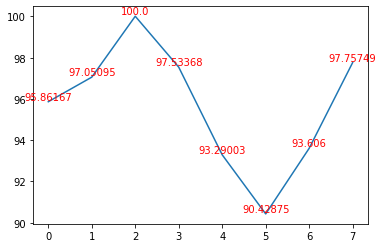

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '공기청정기', 'keywords': ['공기청정기'], 'data': [{'period': '2021-03-01', 'ratio': 99.62828}, {'period': '2021-03-02', 'ratio': 87.0608}, {'period': '2021-03-03', 'ratio': 90.54783}, {'period': '2021-03-04', 'ratio': 87.70687}, {'period': '2021-03-05', 'ratio': 83.45871}, {'period': '2021-03-06', 'ratio': 85.43233}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 97.4334}]}]}


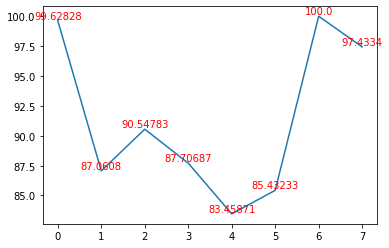

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '냉장고', 'keywords': ['냉장고'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 88.90073}, {'period': '2021-03-03', 'ratio': 83.92428}, {'period': '2021-03-04', 'ratio': 86.01261}, {'period': '2021-03-05', 'ratio': 80.46743}, {'period': '2021-03-06', 'ratio': 91.72665}, {'period': '2021-03-07', 'ratio': 98.06273}, {'period': '2021-03-08', 'ratio': 94.43703}]}]}


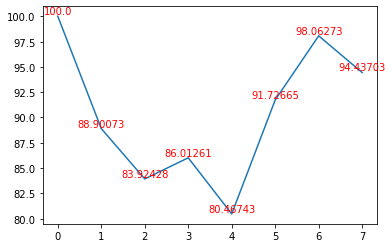

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '노트북', 'keywords': ['노트북'], 'data': [{'period': '2021-03-01', 'ratio': 95.42883}, {'period': '2021-03-02', 'ratio': 100}, {'period': '2021-03-03', 'ratio': 94.86731}, {'period': '2021-03-04', 'ratio': 90.86598}, {'period': '2021-03-05', 'ratio': 78.5126}, {'period': '2021-03-06', 'ratio': 75.79236}, {'period': '2021-03-07', 'ratio': 79.78121}, {'period': '2021-03-08', 'ratio': 80.35521}]}]}


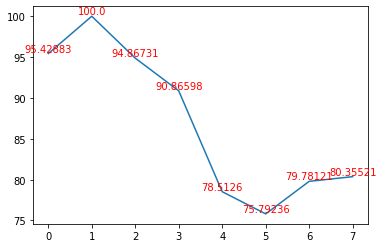

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '다이슨에어랩', 'keywords': ['다이슨에어랩'], 'data': [{'period': '2021-03-01', 'ratio': 69.76226}, {'period': '2021-03-02', 'ratio': 57.47154}, {'period': '2021-03-03', 'ratio': 62.98165}, {'period': '2021-03-04', 'ratio': 74.47526}, {'period': '2021-03-05', 'ratio': 68.24115}, {'period': '2021-03-06', 'ratio': 77.30864}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 75.93024}]}]}


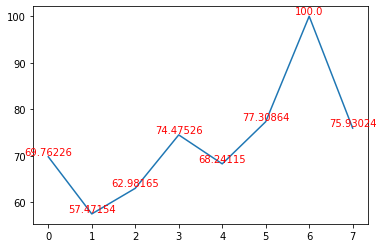

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '에어프라이어', 'keywords': ['에어프라이어'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 70.05001}, {'period': '2021-03-03', 'ratio': 66.22309}, {'period': '2021-03-04', 'ratio': 66.61883}, {'period': '2021-03-05', 'ratio': 56.57751}, {'period': '2021-03-06', 'ratio': 68.95412}, {'period': '2021-03-07', 'ratio': 79.08675}, {'period': '2021-03-08', 'ratio': 64.09654}]}]}


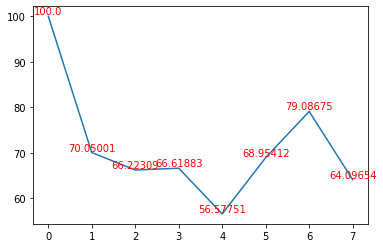

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '전자레인지', 'keywords': ['전자레인지'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 84.20149}, {'period': '2021-03-03', 'ratio': 78.54112}, {'period': '2021-03-04', 'ratio': 73.87379}, {'period': '2021-03-05', 'ratio': 63.98844}, {'period': '2021-03-06', 'ratio': 71.30992}, {'period': '2021-03-07', 'ratio': 86.02509}, {'period': '2021-03-08', 'ratio': 78.95639}]}]}


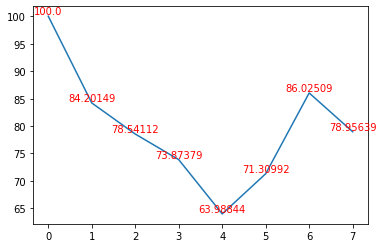

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '불리목욕하는여인', 'keywords': ['불리목욕하는여인'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 80.49414}, {'period': '2021-03-03', 'ratio': 51.95058}, {'period': '2021-03-04', 'ratio': 50.78023}, {'period': '2021-03-05', 'ratio': 41.74252}, {'period': '2021-03-06', 'ratio': 47.65929}, {'period': '2021-03-07', 'ratio': 57.93237}, {'period': '2021-03-08', 'ratio': 44.27828}]}]}


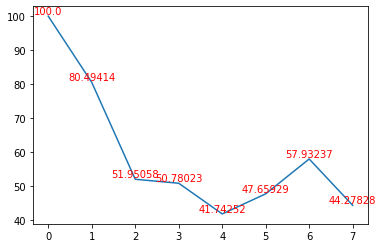

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '아크메드라비반팔', 'keywords': ['아크메드라비반팔'], 'data': [{'period': '2021-03-01', 'ratio': 92.85714}, {'period': '2021-03-02', 'ratio': 67.85714}, {'period': '2021-03-03', 'ratio': 44.64285}, {'period': '2021-03-04', 'ratio': 66.07142}, {'period': '2021-03-05', 'ratio': 82.14285}, {'period': '2021-03-06', 'ratio': 69.64285}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 80.35714}]}]}


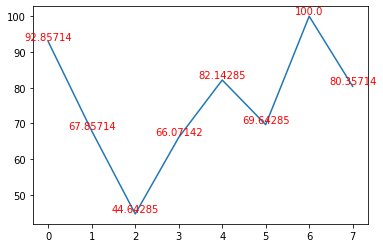

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '널디후드집업', 'keywords': ['널디후드집업'], 'data': [{'period': '2021-03-01', 'ratio': 83.33333}, {'period': '2021-03-02', 'ratio': 66.66666}, {'period': '2021-03-03', 'ratio': 84.89583}, {'period': '2021-03-04', 'ratio': 75}, {'period': '2021-03-05', 'ratio': 71.875}, {'period': '2021-03-06', 'ratio': 100}, {'period': '2021-03-07', 'ratio': 96.35416}, {'period': '2021-03-08', 'ratio': 64.58333}]}]}


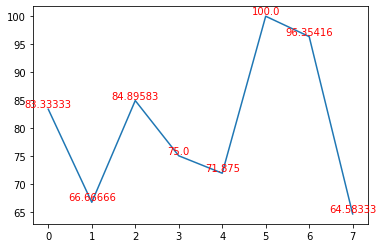

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '백아율오리진크림', 'keywords': ['백아율오리진크림'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 90.2439}, {'period': '2021-03-03', 'ratio': 72.56097}, {'period': '2021-03-04', 'ratio': 81.70731}, {'period': '2021-03-05', 'ratio': 50}, {'period': '2021-03-06', 'ratio': 63.41463}, {'period': '2021-03-07', 'ratio': 68.29268}, {'period': '2021-03-08', 'ratio': 84.14634}]}]}


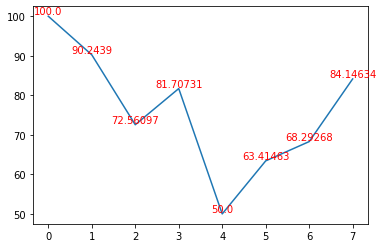

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '육심원가방', 'keywords': ['육심원가방'], 'data': [{'period': '2021-03-01', 'ratio': 72.88135}, {'period': '2021-03-02', 'ratio': 38.98305}, {'period': '2021-03-03', 'ratio': 45.76271}, {'period': '2021-03-04', 'ratio': 38.98305}, {'period': '2021-03-05', 'ratio': 47.45762}, {'period': '2021-03-06', 'ratio': 100}, {'period': '2021-03-07', 'ratio': 47.45762}, {'period': '2021-03-08', 'ratio': 45.76271}]}]}


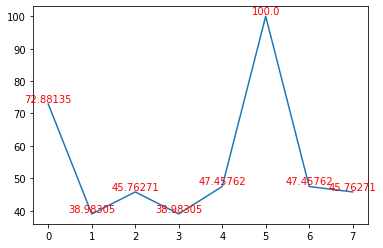

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '키엘오리지널머스크블랜드', 'keywords': ['키엘오리지널머스크블랜드'], 'data': [{'period': '2021-03-01', 'ratio': 84.7826}, {'period': '2021-03-02', 'ratio': 100}, {'period': '2021-03-03', 'ratio': 75.21739}, {'period': '2021-03-04', 'ratio': 74.7826}, {'period': '2021-03-05', 'ratio': 49.13043}, {'period': '2021-03-06', 'ratio': 63.47826}, {'period': '2021-03-07', 'ratio': 77.82608}, {'period': '2021-03-08', 'ratio': 63.04347}]}]}


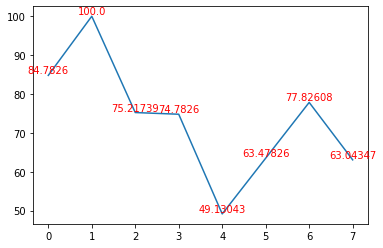

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '미니멜리사190', 'keywords': ['미니멜리사190'], 'data': [{'period': '2021-03-01', 'ratio': 60.9375}, {'period': '2021-03-02', 'ratio': 60.9375}, {'period': '2021-03-03', 'ratio': 81.25}, {'period': '2021-03-04', 'ratio': 78.125}, {'period': '2021-03-05', 'ratio': 100}, {'period': '2021-03-06', 'ratio': 76.5625}, {'period': '2021-03-07', 'ratio': 90.625}, {'period': '2021-03-08', 'ratio': 68.75}]}]}


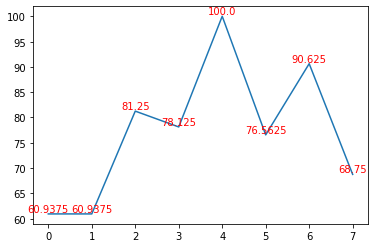

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '양키캔들그린하우스', 'keywords': ['양키캔들그린하우스'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 78.99543}, {'period': '2021-03-03', 'ratio': 67.5799}, {'period': '2021-03-04', 'ratio': 80.36529}, {'period': '2021-03-05', 'ratio': 59.81735}, {'period': '2021-03-06', 'ratio': 83.10502}, {'period': '2021-03-07', 'ratio': 88.12785}, {'period': '2021-03-08', 'ratio': 91.78082}]}]}


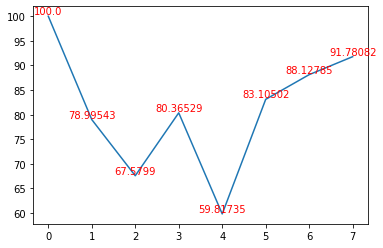

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '휘게릴리프선모이스처라이저', 'keywords': ['휘게릴리프선모이스처라이저'], 'data': [{'period': '2021-03-01', 'ratio': 76.62337}, {'period': '2021-03-02', 'ratio': 80.51948}, {'period': '2021-03-03', 'ratio': 78.57142}, {'period': '2021-03-04', 'ratio': 55.84415}, {'period': '2021-03-05', 'ratio': 44.80519}, {'period': '2021-03-06', 'ratio': 50.64935}, {'period': '2021-03-07', 'ratio': 67.53246}, {'period': '2021-03-08', 'ratio': 100}]}]}


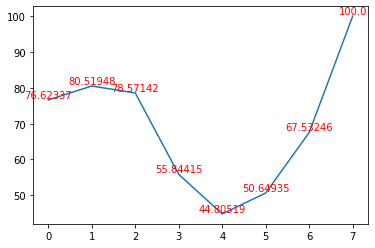

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '샬랑드파리쿠션', 'keywords': ['샬랑드파리쿠션'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 62.05128}, {'period': '2021-03-03', 'ratio': 64.35897}, {'period': '2021-03-04', 'ratio': 56.92307}, {'period': '2021-03-05', 'ratio': 49.23076}, {'period': '2021-03-06', 'ratio': 53.84615}, {'period': '2021-03-07', 'ratio': 58.97435}, {'period': '2021-03-08', 'ratio': 47.94871}]}]}


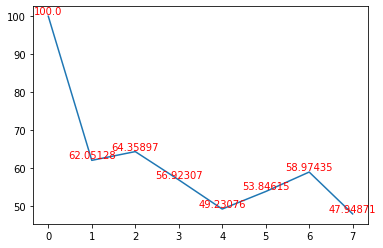

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '마스크', 'keywords': ['마스크'], 'data': [{'period': '2021-03-01', 'ratio': 97.40579}, {'period': '2021-03-02', 'ratio': 91.25222}, {'period': '2021-03-03', 'ratio': 98.94264}, {'period': '2021-03-04', 'ratio': 96.29925}, {'period': '2021-03-05', 'ratio': 84.07819}, {'period': '2021-03-06', 'ratio': 72.96366}, {'period': '2021-03-07', 'ratio': 88.12934}, {'period': '2021-03-08', 'ratio': 100}]}]}


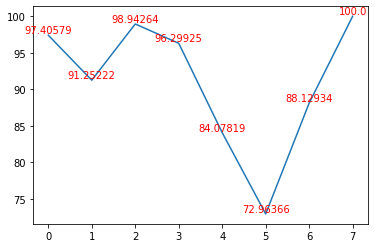

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': 'kf94마스크', 'keywords': ['kf94마스크'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 89.13197}, {'period': '2021-03-03', 'ratio': 94.02869}, {'period': '2021-03-04', 'ratio': 89.65317}, {'period': '2021-03-05', 'ratio': 70.45235}, {'period': '2021-03-06', 'ratio': 62.49276}, {'period': '2021-03-07', 'ratio': 75.8381}, {'period': '2021-03-08', 'ratio': 84.57628}]}]}


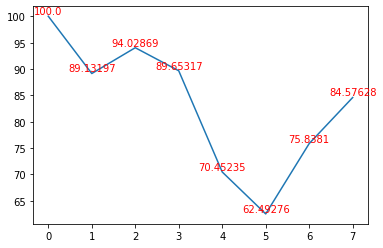

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '스타벅스텀블러', 'keywords': ['스타벅스텀블러'], 'data': [{'period': '2021-03-01', 'ratio': 97.92269}, {'period': '2021-03-02', 'ratio': 81.78199}, {'period': '2021-03-03', 'ratio': 87.18876}, {'period': '2021-03-04', 'ratio': 81.71685}, {'period': '2021-03-05', 'ratio': 79.40069}, {'period': '2021-03-06', 'ratio': 87.94151}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 88.18037}]}]}


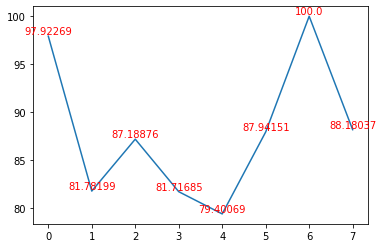

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '와플팬', 'keywords': ['와플팬'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 68.83786}, {'period': '2021-03-03', 'ratio': 54.31701}, {'period': '2021-03-04', 'ratio': 64.04053}, {'period': '2021-03-05', 'ratio': 67.78936}, {'period': '2021-03-06', 'ratio': 75.95477}, {'period': '2021-03-07', 'ratio': 66.31911}, {'period': '2021-03-08', 'ratio': 54.29943}]}]}


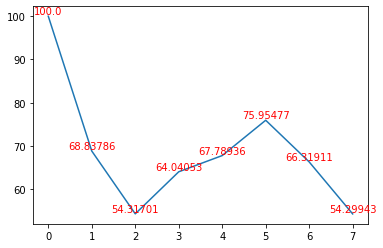

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': 'kf94마스크새부리형', 'keywords': ['kf94마스크새부리형'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 75.42544}, {'period': '2021-03-03', 'ratio': 84.35597}, {'period': '2021-03-04', 'ratio': 84.30913}, {'period': '2021-03-05', 'ratio': 66.82279}, {'period': '2021-03-06', 'ratio': 64.43403}, {'period': '2021-03-07', 'ratio': 76.86182}, {'period': '2021-03-08', 'ratio': 77.65807}]}]}


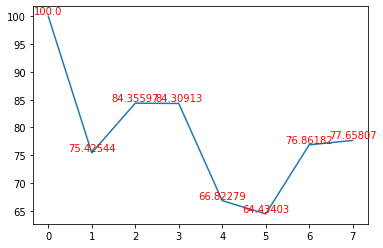

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '텀블러', 'keywords': ['텀블러'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 90.01956}, {'period': '2021-03-03', 'ratio': 82.93542}, {'period': '2021-03-04', 'ratio': 80.82191}, {'period': '2021-03-05', 'ratio': 66.21004}, {'period': '2021-03-06', 'ratio': 70.03261}, {'period': '2021-03-07', 'ratio': 85.32289}, {'period': '2021-03-08', 'ratio': 82.6223}]}]}


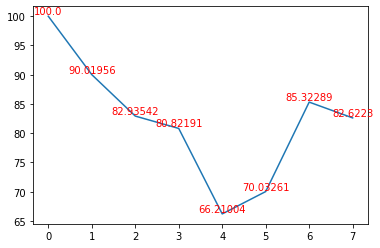

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '마스크스트랩', 'keywords': ['마스크스트랩'], 'data': [{'period': '2021-03-01', 'ratio': 84.55712}, {'period': '2021-03-02', 'ratio': 95.99934}, {'period': '2021-03-03', 'ratio': 97.38228}, {'period': '2021-03-04', 'ratio': 100}, {'period': '2021-03-05', 'ratio': 87.14191}, {'period': '2021-03-06', 'ratio': 86.91142}, {'period': '2021-03-07', 'ratio': 89.97365}, {'period': '2021-03-08', 'ratio': 97.11886}]}]}


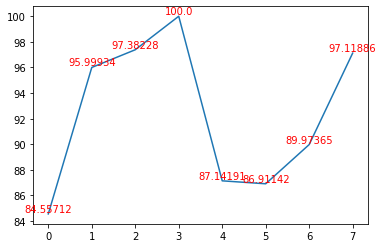

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '화분', 'keywords': ['화분'], 'data': [{'period': '2021-03-01', 'ratio': 86.76307}, {'period': '2021-03-02', 'ratio': 72.03837}, {'period': '2021-03-03', 'ratio': 76.23748}, {'period': '2021-03-04', 'ratio': 72.49721}, {'period': '2021-03-05', 'ratio': 70.27252}, {'period': '2021-03-06', 'ratio': 84.80255}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 89.80812}]}]}


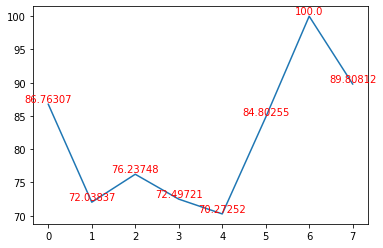

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '전자담배', 'keywords': ['전자담배'], 'data': [{'period': '2021-03-01', 'ratio': 95.36369}, {'period': '2021-03-02', 'ratio': 98.84607}, {'period': '2021-03-03', 'ratio': 97.78487}, {'period': '2021-03-04', 'ratio': 95.71399}, {'period': '2021-03-05', 'ratio': 84.73109}, {'period': '2021-03-06', 'ratio': 83.61838}, {'period': '2021-03-07', 'ratio': 94.86915}, {'period': '2021-03-08', 'ratio': 100}]}]}


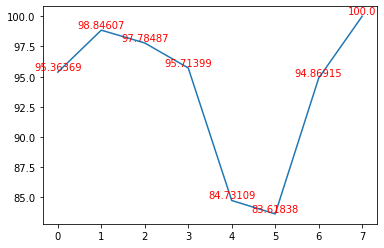

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '빨래건조대', 'keywords': ['빨래건조대'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 72.9321}, {'period': '2021-03-03', 'ratio': 64.2371}, {'period': '2021-03-04', 'ratio': 64.31271}, {'period': '2021-03-05', 'ratio': 55.85967}, {'period': '2021-03-06', 'ratio': 68.4107}, {'period': '2021-03-07', 'ratio': 83.01829}, {'period': '2021-03-08', 'ratio': 72.41796}]}]}


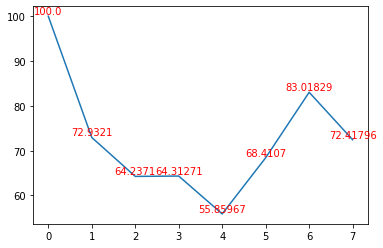

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '여성골프웨어', 'keywords': ['여성골프웨어'], 'data': [{'period': '2021-03-01', 'ratio': 94.57797}, {'period': '2021-03-02', 'ratio': 68.23178}, {'period': '2021-03-03', 'ratio': 71.13843}, {'period': '2021-03-04', 'ratio': 77.15669}, {'period': '2021-03-05', 'ratio': 73.39295}, {'period': '2021-03-06', 'ratio': 89.88261}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 87.42314}]}]}


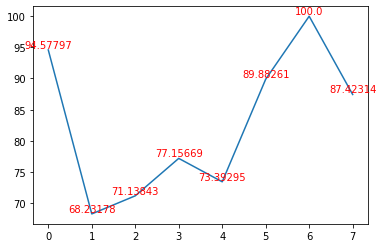

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '등산화', 'keywords': ['등산화'], 'data': [{'period': '2021-03-01', 'ratio': 88.75514}, {'period': '2021-03-02', 'ratio': 66.70729}, {'period': '2021-03-03', 'ratio': 63.59896}, {'period': '2021-03-04', 'ratio': 64.22367}, {'period': '2021-03-05', 'ratio': 58.66219}, {'period': '2021-03-06', 'ratio': 78.63781}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 87.39905}]}]}


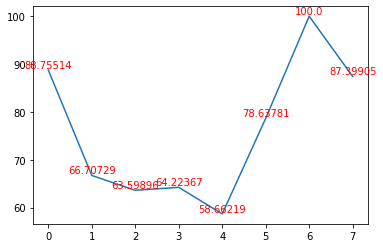

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': 'k2플라이하이크', 'keywords': ['k2플라이하이크'], 'data': [{'period': '2021-03-01', 'ratio': 1.70268}, {'period': '2021-03-02', 'ratio': 1.44073}, {'period': '2021-03-03', 'ratio': 1.45859}, {'period': '2021-03-04', 'ratio': 1.27999}, {'period': '2021-03-05', 'ratio': 21.42049}, {'period': '2021-03-06', 'ratio': 72.48318}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 61.67768}]}]}


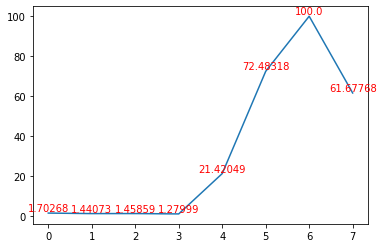

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '캠핑의자', 'keywords': ['캠핑의자'], 'data': [{'period': '2021-03-01', 'ratio': 98.31166}, {'period': '2021-03-02', 'ratio': 70.89312}, {'period': '2021-03-03', 'ratio': 60.47611}, {'period': '2021-03-04', 'ratio': 56.3228}, {'period': '2021-03-05', 'ratio': 56.25527}, {'period': '2021-03-06', 'ratio': 65.32162}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 87.57386}]}]}


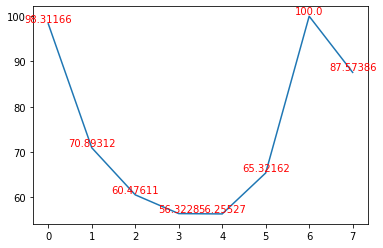

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '자전거', 'keywords': ['자전거'], 'data': [{'period': '2021-03-01', 'ratio': 66.37224}, {'period': '2021-03-02', 'ratio': 55.67348}, {'period': '2021-03-03', 'ratio': 57.87449}, {'period': '2021-03-04', 'ratio': 57.00548}, {'period': '2021-03-05', 'ratio': 61.15107}, {'period': '2021-03-06', 'ratio': 81.44454}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 78.41726}]}]}


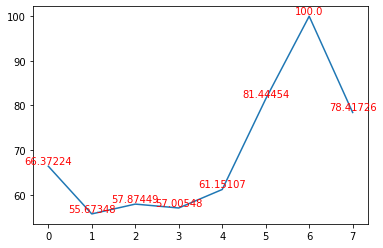

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '전기자전거', 'keywords': ['전기자전거'], 'data': [{'period': '2021-03-01', 'ratio': 77.61175}, {'period': '2021-03-02', 'ratio': 74.63571}, {'period': '2021-03-03', 'ratio': 78.19214}, {'period': '2021-03-04', 'ratio': 76.57446}, {'period': '2021-03-05', 'ratio': 86.49049}, {'period': '2021-03-06', 'ratio': 87.60187}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 95.18399}]}]}


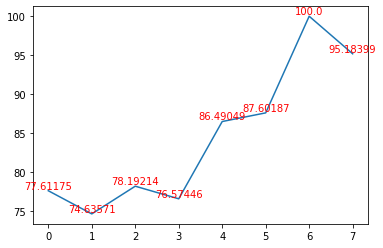

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '텐트', 'keywords': ['텐트'], 'data': [{'period': '2021-03-01', 'ratio': 95.50408}, {'period': '2021-03-02', 'ratio': 65.36103}, {'period': '2021-03-03', 'ratio': 56.89713}, {'period': '2021-03-04', 'ratio': 52.60558}, {'period': '2021-03-05', 'ratio': 56.04564}, {'period': '2021-03-06', 'ratio': 71.03201}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 88.14713}]}]}


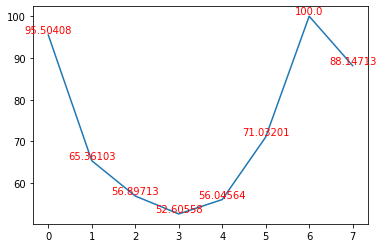

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '캠핑테이블', 'keywords': ['캠핑테이블'], 'data': [{'period': '2021-03-01', 'ratio': 96.90591}, {'period': '2021-03-02', 'ratio': 70.60622}, {'period': '2021-03-03', 'ratio': 57.79816}, {'period': '2021-03-04', 'ratio': 59.21928}, {'period': '2021-03-05', 'ratio': 54.29033}, {'period': '2021-03-06', 'ratio': 64.49001}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 86.63428}]}]}


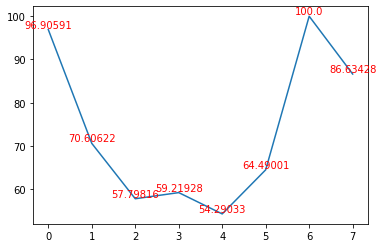

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '캠핑용품', 'keywords': ['캠핑용품'], 'data': [{'period': '2021-03-01', 'ratio': 96.58503}, {'period': '2021-03-02', 'ratio': 71.83673}, {'period': '2021-03-03', 'ratio': 61.55102}, {'period': '2021-03-04', 'ratio': 61.82312}, {'period': '2021-03-05', 'ratio': 59.42857}, {'period': '2021-03-06', 'ratio': 74.74829}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 84.68027}]}]}


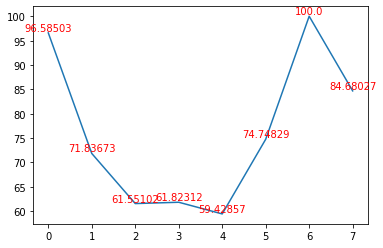

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '차박텐트', 'keywords': ['차박텐트'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 69.36086}, {'period': '2021-03-03', 'ratio': 60.74416}, {'period': '2021-03-04', 'ratio': 56.45362}, {'period': '2021-03-05', 'ratio': 53.60512}, {'period': '2021-03-06', 'ratio': 68.63094}, {'period': '2021-03-07', 'ratio': 93.94694}, {'period': '2021-03-08', 'ratio': 83.3897}]}]}


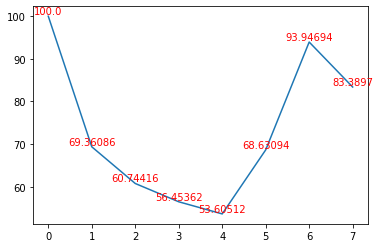

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '닭가슴살', 'keywords': ['닭가슴살'], 'data': [{'period': '2021-03-01', 'ratio': 81.55815}, {'period': '2021-03-02', 'ratio': 96.88605}, {'period': '2021-03-03', 'ratio': 87.16678}, {'period': '2021-03-04', 'ratio': 84.48336}, {'period': '2021-03-05', 'ratio': 63.64118}, {'period': '2021-03-06', 'ratio': 57.78485}, {'period': '2021-03-07', 'ratio': 74.13305}, {'period': '2021-03-08', 'ratio': 100}]}]}


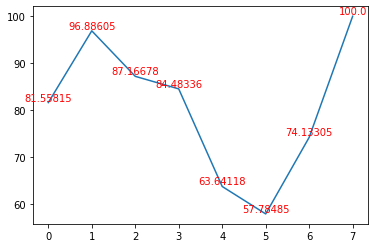

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '미역국수', 'keywords': ['미역국수'], 'data': [{'period': '2021-03-01', 'ratio': 64.95535}, {'period': '2021-03-02', 'ratio': 72.99107}, {'period': '2021-03-03', 'ratio': 78.79464}, {'period': '2021-03-04', 'ratio': 85.49107}, {'period': '2021-03-05', 'ratio': 100}, {'period': '2021-03-06', 'ratio': 76.11607}, {'period': '2021-03-07', 'ratio': 85.71428}, {'period': '2021-03-08', 'ratio': 97.99107}]}]}


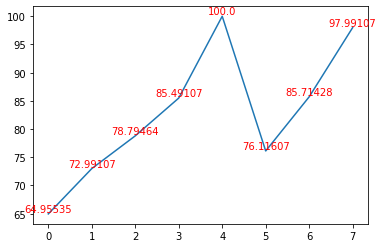

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '오메가3', 'keywords': ['오메가3'], 'data': [{'period': '2021-03-01', 'ratio': 93.30342}, {'period': '2021-03-02', 'ratio': 93.78404}, {'period': '2021-03-03', 'ratio': 98.38726}, {'period': '2021-03-04', 'ratio': 99.15625}, {'period': '2021-03-05', 'ratio': 83.73384}, {'period': '2021-03-06', 'ratio': 84.2999}, {'period': '2021-03-07', 'ratio': 94.11513}, {'period': '2021-03-08', 'ratio': 100}]}]}


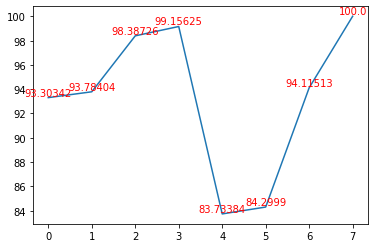

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '쌀20kg', 'keywords': ['쌀20kg'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 73.18425}, {'period': '2021-03-03', 'ratio': 71.50229}, {'period': '2021-03-04', 'ratio': 69.55275}, {'period': '2021-03-05', 'ratio': 54.56804}, {'period': '2021-03-06', 'ratio': 57.62614}, {'period': '2021-03-07', 'ratio': 75.22935}, {'period': '2021-03-08', 'ratio': 71.17737}]}]}


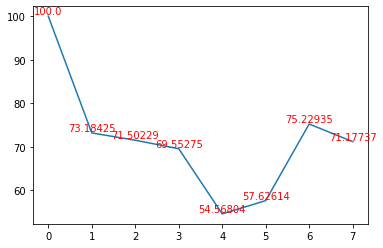

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '콤부차', 'keywords': ['콤부차'], 'data': [{'period': '2021-03-01', 'ratio': 13.36573}, {'period': '2021-03-02', 'ratio': 11.36377}, {'period': '2021-03-03', 'ratio': 15.47466}, {'period': '2021-03-04', 'ratio': 20.60028}, {'period': '2021-03-05', 'ratio': 16.29072}, {'period': '2021-03-06', 'ratio': 21.80756}, {'period': '2021-03-07', 'ratio': 64.2093}, {'period': '2021-03-08', 'ratio': 100}]}]}


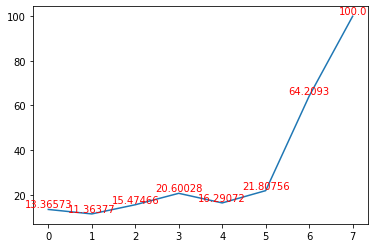

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '생수', 'keywords': ['생수'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 94.53262}, {'period': '2021-03-03', 'ratio': 84.71487}, {'period': '2021-03-04', 'ratio': 77.32706}, {'period': '2021-03-05', 'ratio': 62.43386}, {'period': '2021-03-06', 'ratio': 60.70938}, {'period': '2021-03-07', 'ratio': 86.20419}, {'period': '2021-03-08', 'ratio': 95.27728}]}]}


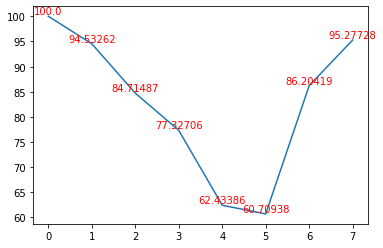

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '그릭요거트', 'keywords': ['그릭요거트'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 82.08429}, {'period': '2021-03-03', 'ratio': 67.38348}, {'period': '2021-03-04', 'ratio': 61.06156}, {'period': '2021-03-05', 'ratio': 52.06415}, {'period': '2021-03-06', 'ratio': 57.58774}, {'period': '2021-03-07', 'ratio': 64.36996}, {'period': '2021-03-08', 'ratio': 62.16915}]}]}


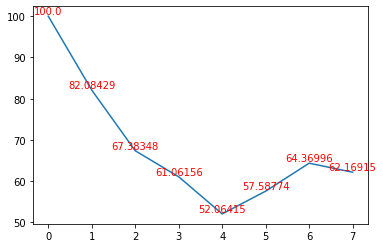

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '유산균', 'keywords': ['유산균'], 'data': [{'period': '2021-03-01', 'ratio': 97.99583}, {'period': '2021-03-02', 'ratio': 95.78359}, {'period': '2021-03-03', 'ratio': 100}, {'period': '2021-03-04', 'ratio': 93.3085}, {'period': '2021-03-05', 'ratio': 82.75106}, {'period': '2021-03-06', 'ratio': 84.53619}, {'period': '2021-03-07', 'ratio': 93.56039}, {'period': '2021-03-08', 'ratio': 98.94863}]}]}


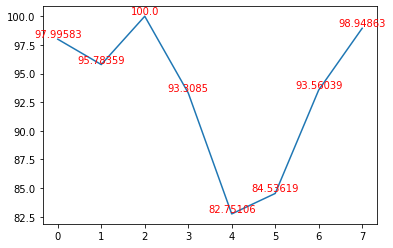

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '콜라겐', 'keywords': ['콜라겐'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 55.53324}, {'period': '2021-03-03', 'ratio': 59.34781}, {'period': '2021-03-04', 'ratio': 54.28606}, {'period': '2021-03-05', 'ratio': 42.33132}, {'period': '2021-03-06', 'ratio': 49.84486}, {'period': '2021-03-07', 'ratio': 59.54857}, {'period': '2021-03-08', 'ratio': 60.73492}]}]}


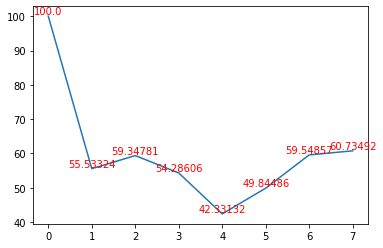

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '햇반', 'keywords': ['햇반'], 'data': [{'period': '2021-03-01', 'ratio': 98.03131}, {'period': '2021-03-02', 'ratio': 100}, {'period': '2021-03-03', 'ratio': 85.95078}, {'period': '2021-03-04', 'ratio': 82.52796}, {'period': '2021-03-05', 'ratio': 67.0246}, {'period': '2021-03-06', 'ratio': 67.42729}, {'period': '2021-03-07', 'ratio': 89.5302}, {'period': '2021-03-08', 'ratio': 94.83221}]}]}


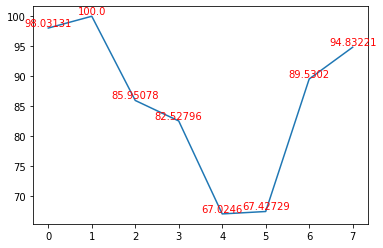

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '제주렌트카', 'keywords': ['제주렌트카'], 'data': [{'period': '2021-03-01', 'ratio': 81.19042}, {'period': '2021-03-02', 'ratio': 84.12045}, {'period': '2021-03-03', 'ratio': 83.55177}, {'period': '2021-03-04', 'ratio': 84.91117}, {'period': '2021-03-05', 'ratio': 79.36525}, {'period': '2021-03-06', 'ratio': 75.27621}, {'period': '2021-03-07', 'ratio': 83.1185}, {'period': '2021-03-08', 'ratio': 100}]}]}


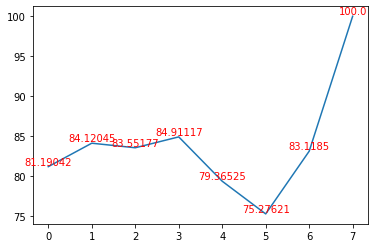

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '문화상품권', 'keywords': ['문화상품권'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 77.81582}, {'period': '2021-03-03', 'ratio': 74.15584}, {'period': '2021-03-04', 'ratio': 60.7556}, {'period': '2021-03-05', 'ratio': 69.74025}, {'period': '2021-03-06', 'ratio': 68.3353}, {'period': '2021-03-07', 'ratio': 66.13931}, {'period': '2021-03-08', 'ratio': 63.86068}]}]}


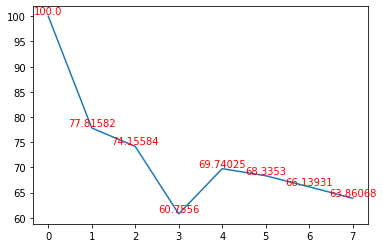

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '제주도렌트카', 'keywords': ['제주도렌트카'], 'data': [{'period': '2021-03-01', 'ratio': 82.96885}, {'period': '2021-03-02', 'ratio': 84.29423}, {'period': '2021-03-03', 'ratio': 84.14512}, {'period': '2021-03-04', 'ratio': 83.49072}, {'period': '2021-03-05', 'ratio': 77.60934}, {'period': '2021-03-06', 'ratio': 69.74817}, {'period': '2021-03-07', 'ratio': 84.88237}, {'period': '2021-03-08', 'ratio': 100}]}]}


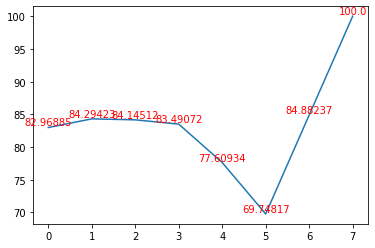

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '꽃배달', 'keywords': ['꽃배달'], 'data': [{'period': '2021-03-01', 'ratio': 83.39331}, {'period': '2021-03-02', 'ratio': 100}, {'period': '2021-03-03', 'ratio': 81.81662}, {'period': '2021-03-04', 'ratio': 76.62382}, {'period': '2021-03-05', 'ratio': 69.94001}, {'period': '2021-03-06', 'ratio': 61.07969}, {'period': '2021-03-07', 'ratio': 56.34961}, {'period': '2021-03-08', 'ratio': 89.04884}]}]}


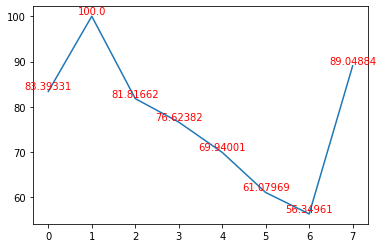

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '캠핑카렌트', 'keywords': ['캠핑카렌트'], 'data': [{'period': '2021-03-01', 'ratio': 86.81798}, {'period': '2021-03-02', 'ratio': 58.40244}, {'period': '2021-03-03', 'ratio': 58.92623}, {'period': '2021-03-04', 'ratio': 54.43037}, {'period': '2021-03-05', 'ratio': 57.44216}, {'period': '2021-03-06', 'ratio': 66.08467}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 70.40593}]}]}


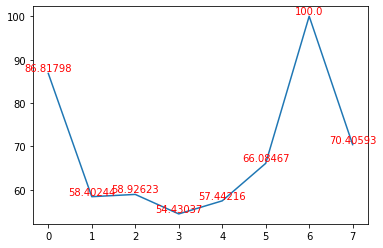

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '신세계상품권', 'keywords': ['신세계상품권'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 81.83939}, {'period': '2021-03-03', 'ratio': 73.57573}, {'period': '2021-03-04', 'ratio': 76.23954}, {'period': '2021-03-05', 'ratio': 75.34512}, {'period': '2021-03-06', 'ratio': 83.43379}, {'period': '2021-03-07', 'ratio': 85.92261}, {'period': '2021-03-08', 'ratio': 87.22535}]}]}


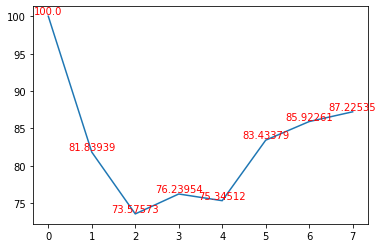

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '제주도항공권', 'keywords': ['제주도항공권'], 'data': [{'period': '2021-03-01', 'ratio': 70.47957}, {'period': '2021-03-02', 'ratio': 79.30117}, {'period': '2021-03-03', 'ratio': 77.1536}, {'period': '2021-03-04', 'ratio': 75.76908}, {'period': '2021-03-05', 'ratio': 74.89555}, {'period': '2021-03-06', 'ratio': 64.3994}, {'period': '2021-03-07', 'ratio': 74.46742}, {'period': '2021-03-08', 'ratio': 100}]}]}


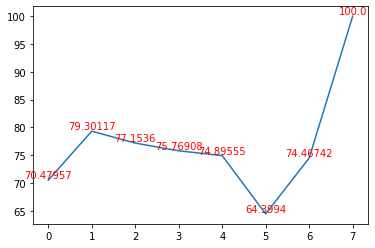

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '머지포인트', 'keywords': ['머지포인트'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 69.18965}, {'period': '2021-03-03', 'ratio': 56.07755}, {'period': '2021-03-04', 'ratio': 56.94755}, {'period': '2021-03-05', 'ratio': 58.89883}, {'period': '2021-03-06', 'ratio': 71.30251}, {'period': '2021-03-07', 'ratio': 67.56152}, {'period': '2021-03-08', 'ratio': 57.70569}]}]}


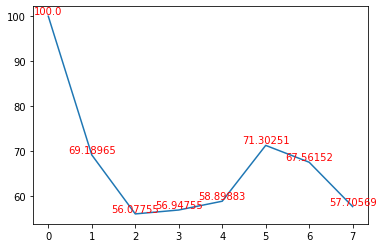

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '구글기프트카드', 'keywords': ['구글기프트카드'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 81.80133}, {'period': '2021-03-03', 'ratio': 73.46182}, {'period': '2021-03-04', 'ratio': 70.53372}, {'period': '2021-03-05', 'ratio': 73.42475}, {'period': '2021-03-06', 'ratio': 77.72424}, {'period': '2021-03-07', 'ratio': 73.86953}, {'period': '2021-03-08', 'ratio': 67.04966}]}]}


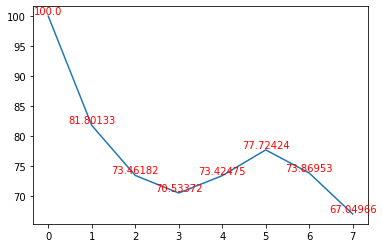

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '생화', 'keywords': ['생화'], 'data': [{'period': '2021-03-01', 'ratio': 77.35229}, {'period': '2021-03-02', 'ratio': 75.0547}, {'period': '2021-03-03', 'ratio': 70.67833}, {'period': '2021-03-04', 'ratio': 69.36542}, {'period': '2021-03-05', 'ratio': 63.78555}, {'period': '2021-03-06', 'ratio': 73.96061}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 85.01094}]}]}


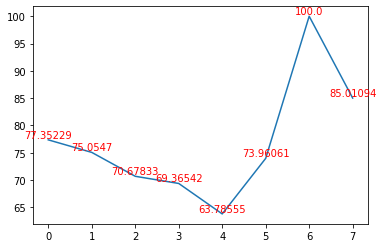

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '나이키데이브레이크', 'keywords': ['나이키데이브레이크'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 82.89028}, {'period': '2021-03-03', 'ratio': 74.91547}, {'period': '2021-03-04', 'ratio': 72.08231}, {'period': '2021-03-05', 'ratio': 67.88504}, {'period': '2021-03-06', 'ratio': 82.26944}, {'period': '2021-03-07', 'ratio': 91.59088}, {'period': '2021-03-08', 'ratio': 79.15937}]}]}


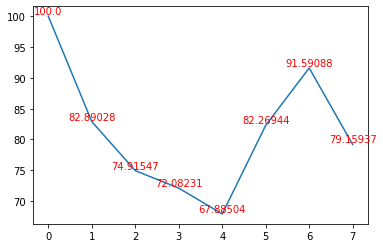

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '나이키운동화', 'keywords': ['나이키운동화'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 71.86368}, {'period': '2021-03-03', 'ratio': 71.15132}, {'period': '2021-03-04', 'ratio': 70.66615}, {'period': '2021-03-05', 'ratio': 65.8144}, {'period': '2021-03-06', 'ratio': 85.8683}, {'period': '2021-03-07', 'ratio': 97.65498}, {'period': '2021-03-08', 'ratio': 76.06469}]}]}


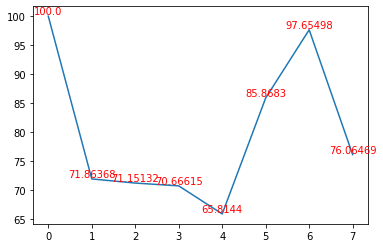

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '크록스', 'keywords': ['크록스'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 85.64573}, {'period': '2021-03-03', 'ratio': 85.72918}, {'period': '2021-03-04', 'ratio': 87.65908}, {'period': '2021-03-05', 'ratio': 78.44773}, {'period': '2021-03-06', 'ratio': 85.77613}, {'period': '2021-03-07', 'ratio': 92.78113}, {'period': '2021-03-08', 'ratio': 90.30878}]}]}


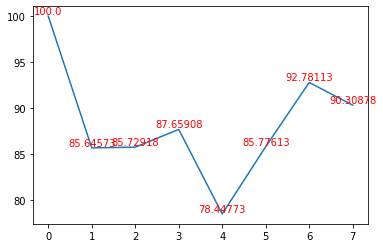

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '운동화', 'keywords': ['운동화'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 73.94847}, {'period': '2021-03-03', 'ratio': 71.95934}, {'period': '2021-03-04', 'ratio': 72.44128}, {'period': '2021-03-05', 'ratio': 66.71924}, {'period': '2021-03-06', 'ratio': 85.05082}, {'period': '2021-03-07', 'ratio': 95.97791}, {'period': '2021-03-08', 'ratio': 77.97055}]}]}


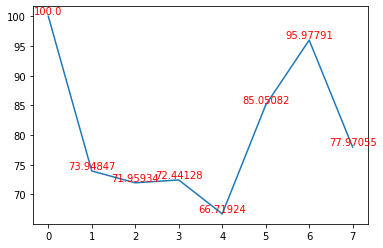

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '뉴발란스327', 'keywords': ['뉴발란스327'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 82.07979}, {'period': '2021-03-03', 'ratio': 85.95775}, {'period': '2021-03-04', 'ratio': 80.01229}, {'period': '2021-03-05', 'ratio': 73.30688}, {'period': '2021-03-06', 'ratio': 83.07443}, {'period': '2021-03-07', 'ratio': 93.57957}, {'period': '2021-03-08', 'ratio': 89.47809}]}]}


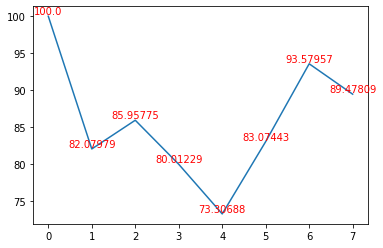

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '나이키에어맥스97', 'keywords': ['나이키에어맥스97'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 73.85837}, {'period': '2021-03-03', 'ratio': 70.14262}, {'period': '2021-03-04', 'ratio': 69.76104}, {'period': '2021-03-05', 'ratio': 65.50731}, {'period': '2021-03-06', 'ratio': 84.61779}, {'period': '2021-03-07', 'ratio': 95.29588}, {'period': '2021-03-08', 'ratio': 75.29087}]}]}


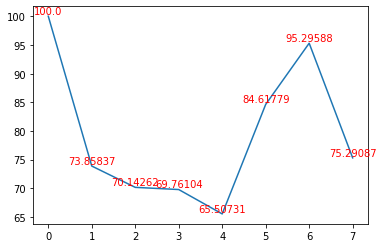

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '슬리퍼', 'keywords': ['슬리퍼'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 77.31843}, {'period': '2021-03-03', 'ratio': 66.0593}, {'period': '2021-03-04', 'ratio': 57.68801}, {'period': '2021-03-05', 'ratio': 52.53115}, {'period': '2021-03-06', 'ratio': 57.0434}, {'period': '2021-03-07', 'ratio': 66.70391}, {'period': '2021-03-08', 'ratio': 59.47571}]}]}


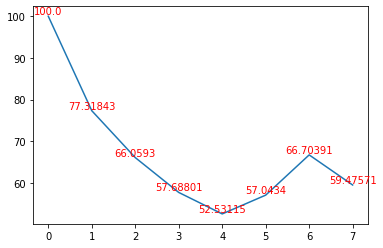

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '아디다스운동화', 'keywords': ['아디다스운동화'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 69.53611}, {'period': '2021-03-03', 'ratio': 67.55137}, {'period': '2021-03-04', 'ratio': 67.05813}, {'period': '2021-03-05', 'ratio': 65.41397}, {'period': '2021-03-06', 'ratio': 83.75807}, {'period': '2021-03-07', 'ratio': 94.65648}, {'period': '2021-03-08', 'ratio': 74.38637}]}]}


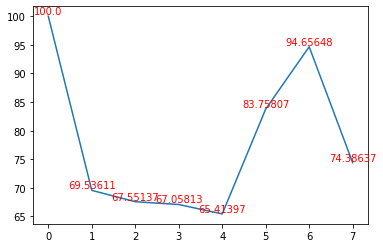

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '뉴발란스530', 'keywords': ['뉴발란스530'], 'data': [{'period': '2021-03-01', 'ratio': 94.83248}, {'period': '2021-03-02', 'ratio': 74.82052}, {'period': '2021-03-03', 'ratio': 72.32276}, {'period': '2021-03-04', 'ratio': 71.62728}, {'period': '2021-03-05', 'ratio': 71.73945}, {'period': '2021-03-06', 'ratio': 84.37032}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 88.24409}]}]}


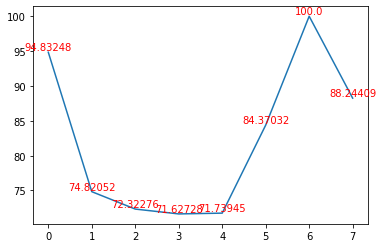

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '카드지갑', 'keywords': ['카드지갑'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 82.3676}, {'period': '2021-03-03', 'ratio': 79.12772}, {'period': '2021-03-04', 'ratio': 79.6137}, {'period': '2021-03-05', 'ratio': 74.56697}, {'period': '2021-03-06', 'ratio': 84.72274}, {'period': '2021-03-07', 'ratio': 97.00934}, {'period': '2021-03-08', 'ratio': 81.28348}]}]}


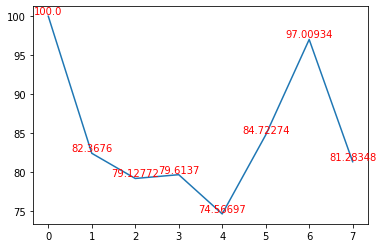

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '원피스', 'keywords': ['원피스'], 'data': [{'period': '2021-03-01', 'ratio': 90.22119}, {'period': '2021-03-02', 'ratio': 64.13396}, {'period': '2021-03-03', 'ratio': 64.42764}, {'period': '2021-03-04', 'ratio': 68.78905}, {'period': '2021-03-05', 'ratio': 70.3949}, {'period': '2021-03-06', 'ratio': 86.34716}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 81.62959}]}]}


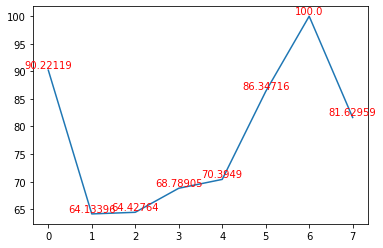

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '트위드자켓', 'keywords': ['트위드자켓'], 'data': [{'period': '2021-03-01', 'ratio': 98.45423}, {'period': '2021-03-02', 'ratio': 74.42917}, {'period': '2021-03-03', 'ratio': 73.95433}, {'period': '2021-03-04', 'ratio': 77.88442}, {'period': '2021-03-05', 'ratio': 75.37886}, {'period': '2021-03-06', 'ratio': 93.92806}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 85.65366}]}]}


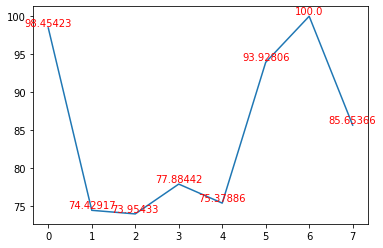

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '트렌치코트', 'keywords': ['트렌치코트'], 'data': [{'period': '2021-03-01', 'ratio': 92.544}, {'period': '2021-03-02', 'ratio': 64.992}, {'period': '2021-03-03', 'ratio': 67.056}, {'period': '2021-03-04', 'ratio': 72.88}, {'period': '2021-03-05', 'ratio': 75.32799}, {'period': '2021-03-06', 'ratio': 85.888}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 89.12}]}]}


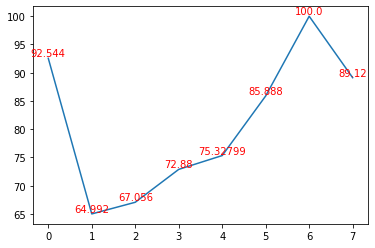

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '나이키바람막이', 'keywords': ['나이키바람막이'], 'data': [{'period': '2021-03-01', 'ratio': 82.09693}, {'period': '2021-03-02', 'ratio': 58.7537}, {'period': '2021-03-03', 'ratio': 55.27942}, {'period': '2021-03-04', 'ratio': 57.15875}, {'period': '2021-03-05', 'ratio': 54.27794}, {'period': '2021-03-06', 'ratio': 79.53758}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 85.92977}]}]}


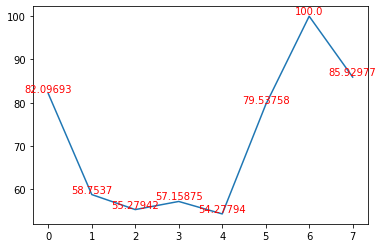

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '블라우스', 'keywords': ['블라우스'], 'data': [{'period': '2021-03-01', 'ratio': 90.83997}, {'period': '2021-03-02', 'ratio': 61.11513}, {'period': '2021-03-03', 'ratio': 64.91672}, {'period': '2021-03-04', 'ratio': 64.57277}, {'period': '2021-03-05', 'ratio': 66.65459}, {'period': '2021-03-06', 'ratio': 88.12454}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 79.59811}]}]}


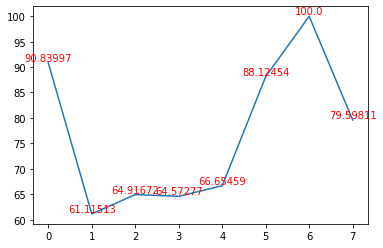

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '바람막이', 'keywords': ['바람막이'], 'data': [{'period': '2021-03-01', 'ratio': 86.99031}, {'period': '2021-03-02', 'ratio': 66.30395}, {'period': '2021-03-03', 'ratio': 62.78847}, {'period': '2021-03-04', 'ratio': 66.71051}, {'period': '2021-03-05', 'ratio': 68.33672}, {'period': '2021-03-06', 'ratio': 81.51381}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 91.73741}]}]}


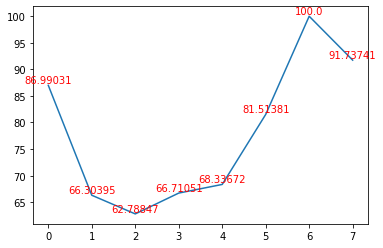

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '후드집업', 'keywords': ['후드집업'], 'data': [{'period': '2021-03-01', 'ratio': 84.24866}, {'period': '2021-03-02', 'ratio': 67.54614}, {'period': '2021-03-03', 'ratio': 68.87102}, {'period': '2021-03-04', 'ratio': 70.80738}, {'period': '2021-03-05', 'ratio': 67.93115}, {'period': '2021-03-06', 'ratio': 84.32793}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 86.49077}]}]}


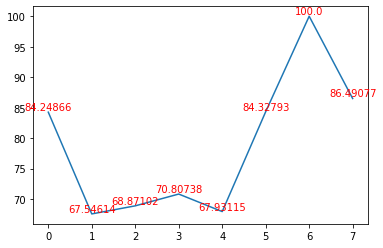

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '여자트렌치코트', 'keywords': ['여자트렌치코트'], 'data': [{'period': '2021-03-01', 'ratio': 79.03619}, {'period': '2021-03-02', 'ratio': 48.30113}, {'period': '2021-03-03', 'ratio': 54.34155}, {'period': '2021-03-04', 'ratio': 57.22851}, {'period': '2021-03-05', 'ratio': 59.96002}, {'period': '2021-03-06', 'ratio': 83.30002}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 81.92316}]}]}


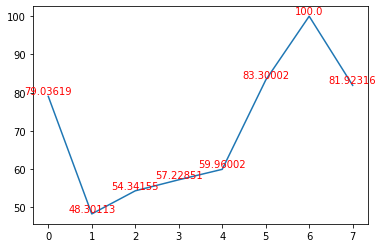

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '롱원피스', 'keywords': ['롱원피스'], 'data': [{'period': '2021-03-01', 'ratio': 93.50465}, {'period': '2021-03-02', 'ratio': 70.31911}, {'period': '2021-03-03', 'ratio': 77.01214}, {'period': '2021-03-04', 'ratio': 83.78988}, {'period': '2021-03-05', 'ratio': 82.32137}, {'period': '2021-03-06', 'ratio': 93.39169}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 93.6741}]}]}


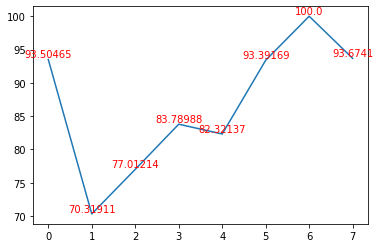

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '여성트레이닝세트', 'keywords': ['여성트레이닝세트'], 'data': [{'period': '2021-03-01', 'ratio': 88.05122}, {'period': '2021-03-02', 'ratio': 64.91049}, {'period': '2021-03-03', 'ratio': 68.31611}, {'period': '2021-03-04', 'ratio': 69.26211}, {'period': '2021-03-05', 'ratio': 68.72362}, {'period': '2021-03-06', 'ratio': 80.70149}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 84.28176}]}]}


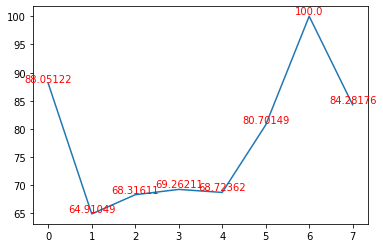

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '크록스키즈', 'keywords': ['크록스키즈'], 'data': [{'period': '2021-03-01', 'ratio': 79.09977}, {'period': '2021-03-02', 'ratio': 61.15252}, {'period': '2021-03-03', 'ratio': 68.03325}, {'period': '2021-03-04', 'ratio': 78.29701}, {'period': '2021-03-05', 'ratio': 69.83944}, {'period': '2021-03-06', 'ratio': 88.53211}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 86.86926}]}]}


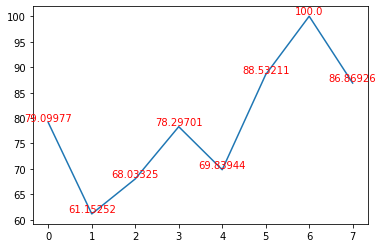

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '키즈경량패딩', 'keywords': ['키즈경량패딩'], 'data': [{'period': '2021-03-01', 'ratio': 75.19931}, {'period': '2021-03-02', 'ratio': 73.43244}, {'period': '2021-03-03', 'ratio': 85.24024}, {'period': '2021-03-04', 'ratio': 91.42426}, {'period': '2021-03-05', 'ratio': 74.72527}, {'period': '2021-03-06', 'ratio': 60.28873}, {'period': '2021-03-07', 'ratio': 73.15233}, {'period': '2021-03-08', 'ratio': 100}]}]}


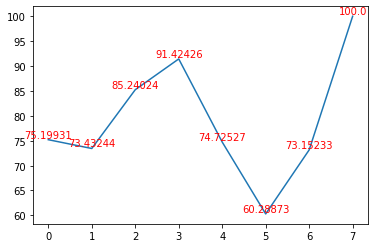

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '키즈바람막이', 'keywords': ['키즈바람막이'], 'data': [{'period': '2021-03-01', 'ratio': 74.62551}, {'period': '2021-03-02', 'ratio': 47.79845}, {'period': '2021-03-03', 'ratio': 58.37494}, {'period': '2021-03-04', 'ratio': 57.55787}, {'period': '2021-03-05', 'ratio': 68.95142}, {'period': '2021-03-06', 'ratio': 72.71901}, {'period': '2021-03-07', 'ratio': 82.61461}, {'period': '2021-03-08', 'ratio': 100}]}]}


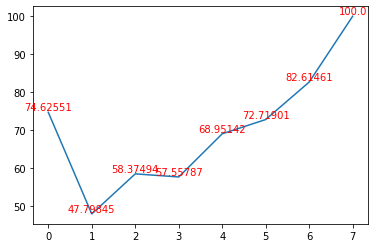

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '키즈운동화', 'keywords': ['키즈운동화'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 84.66987}, {'period': '2021-03-03', 'ratio': 84.81156}, {'period': '2021-03-04', 'ratio': 80.19268}, {'period': '2021-03-05', 'ratio': 63.78577}, {'period': '2021-03-06', 'ratio': 70.21819}, {'period': '2021-03-07', 'ratio': 77.58571}, {'period': '2021-03-08', 'ratio': 80.81609}]}]}


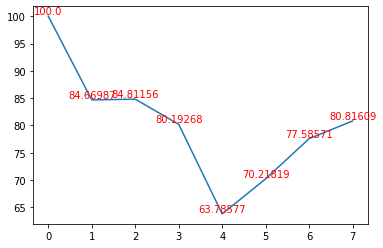

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '베베드피노', 'keywords': ['베베드피노'], 'data': [{'period': '2021-03-01', 'ratio': 93.18703}, {'period': '2021-03-02', 'ratio': 91.95595}, {'period': '2021-03-03', 'ratio': 94.62456}, {'period': '2021-03-04', 'ratio': 100}, {'period': '2021-03-05', 'ratio': 94.50221}, {'period': '2021-03-06', 'ratio': 86.03762}, {'period': '2021-03-07', 'ratio': 87.06988}, {'period': '2021-03-08', 'ratio': 99.43416}]}]}


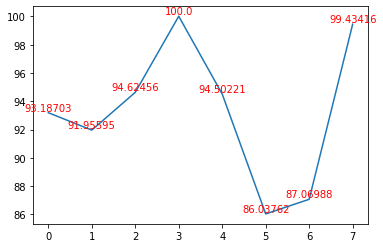

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '아디다스키즈운동화', 'keywords': ['아디다스키즈운동화'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 84.25196}, {'period': '2021-03-03', 'ratio': 81.56394}, {'period': '2021-03-04', 'ratio': 82.29704}, {'period': '2021-03-05', 'ratio': 67.33641}, {'period': '2021-03-06', 'ratio': 78.90306}, {'period': '2021-03-07', 'ratio': 84.25196}, {'period': '2021-03-08', 'ratio': 83.92614}]}]}


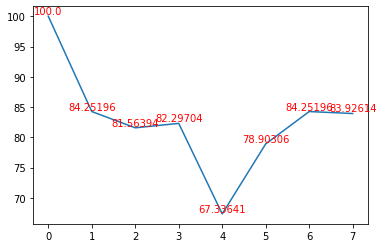

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '뉴발란스키즈', 'keywords': ['뉴발란스키즈'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 81.73587}, {'period': '2021-03-03', 'ratio': 82.58923}, {'period': '2021-03-04', 'ratio': 82.12092}, {'period': '2021-03-05', 'ratio': 69.20595}, {'period': '2021-03-06', 'ratio': 74.32615}, {'period': '2021-03-07', 'ratio': 88.12571}, {'period': '2021-03-08', 'ratio': 87.23072}]}]}


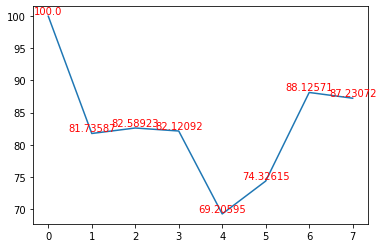

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '나이키키즈운동화', 'keywords': ['나이키키즈운동화'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 77.09304}, {'period': '2021-03-03', 'ratio': 77.09304}, {'period': '2021-03-04', 'ratio': 72.7257}, {'period': '2021-03-05', 'ratio': 62.00586}, {'period': '2021-03-06', 'ratio': 73.6406}, {'period': '2021-03-07', 'ratio': 77.99067}, {'period': '2021-03-08', 'ratio': 71.8108}]}]}


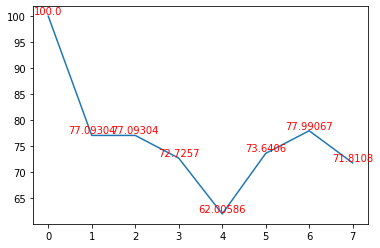

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '미니멜리사', 'keywords': ['미니멜리사'], 'data': [{'period': '2021-03-01', 'ratio': 86.34989}, {'period': '2021-03-02', 'ratio': 74.42764}, {'period': '2021-03-03', 'ratio': 73.43412}, {'period': '2021-03-04', 'ratio': 92.05183}, {'period': '2021-03-05', 'ratio': 90.75593}, {'period': '2021-03-06', 'ratio': 99.61123}, {'period': '2021-03-07', 'ratio': 98.22894}, {'period': '2021-03-08', 'ratio': 100}]}]}


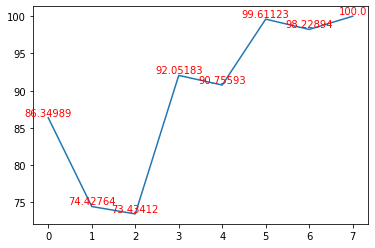

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '휠라키즈운동화', 'keywords': ['휠라키즈운동화'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 69.81132}, {'period': '2021-03-03', 'ratio': 64.77987}, {'period': '2021-03-04', 'ratio': 66.22914}, {'period': '2021-03-05', 'ratio': 55.75608}, {'period': '2021-03-06', 'ratio': 74.21383}, {'period': '2021-03-07', 'ratio': 87.36669}, {'period': '2021-03-08', 'ratio': 68.52611}]}]}


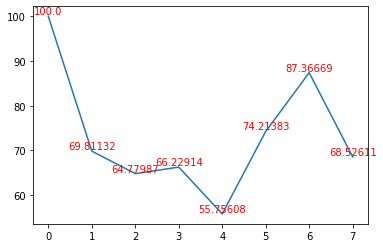

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '바디미스트', 'keywords': ['바디미스트'], 'data': [{'period': '2021-03-01', 'ratio': 88.01295}, {'period': '2021-03-02', 'ratio': 82.07343}, {'period': '2021-03-03', 'ratio': 76.02591}, {'period': '2021-03-04', 'ratio': 72.13822}, {'period': '2021-03-05', 'ratio': 67.60259}, {'period': '2021-03-06', 'ratio': 73.21814}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 92.11663}]}]}


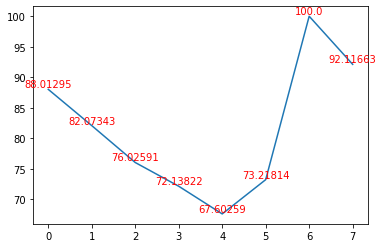

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '가히멀티밤', 'keywords': ['가히멀티밤'], 'data': [{'period': '2021-03-01', 'ratio': 78.82857}, {'period': '2021-03-02', 'ratio': 100}, {'period': '2021-03-03', 'ratio': 65.95784}, {'period': '2021-03-04', 'ratio': 56.91102}, {'period': '2021-03-05', 'ratio': 39.95523}, {'period': '2021-03-06', 'ratio': 39.95523}, {'period': '2021-03-07', 'ratio': 86.66293}, {'period': '2021-03-08', 'ratio': 51.27774}]}]}


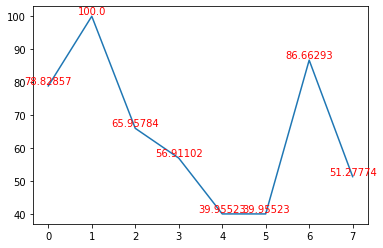

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '헤라블랙쿠션', 'keywords': ['헤라블랙쿠션'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 84.73561}, {'period': '2021-03-03', 'ratio': 84.17026}, {'period': '2021-03-04', 'ratio': 76.32191}, {'period': '2021-03-05', 'ratio': 70.93448}, {'period': '2021-03-06', 'ratio': 71.43332}, {'period': '2021-03-07', 'ratio': 88.26072}, {'period': '2021-03-08', 'ratio': 80.77818}]}]}


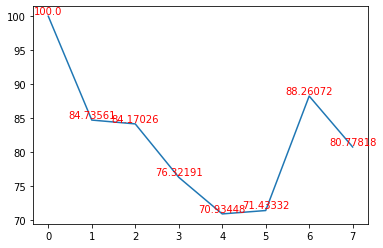

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '인셀덤', 'keywords': ['인셀덤'], 'data': [{'period': '2021-03-01', 'ratio': 68.36367}, {'period': '2021-03-02', 'ratio': 81.95385}, {'period': '2021-03-03', 'ratio': 100}, {'period': '2021-03-04', 'ratio': 93.17315}, {'period': '2021-03-05', 'ratio': 82.77942}, {'period': '2021-03-06', 'ratio': 74.70364}, {'period': '2021-03-07', 'ratio': 69.6232}, {'period': '2021-03-08', 'ratio': 82.23962}]}]}


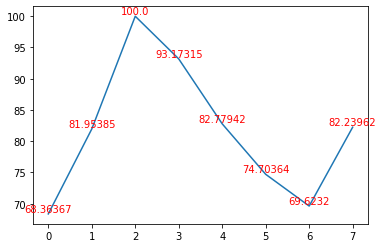

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': 'ahc아이크림', 'keywords': ['ahc아이크림'], 'data': [{'period': '2021-03-01', 'ratio': 95.60475}, {'period': '2021-03-02', 'ratio': 70.25776}, {'period': '2021-03-03', 'ratio': 84.8645}, {'period': '2021-03-04', 'ratio': 100}, {'period': '2021-03-05', 'ratio': 67.54791}, {'period': '2021-03-06', 'ratio': 79.77528}, {'period': '2021-03-07', 'ratio': 74.75214}, {'period': '2021-03-08', 'ratio': 78.55254}]}]}


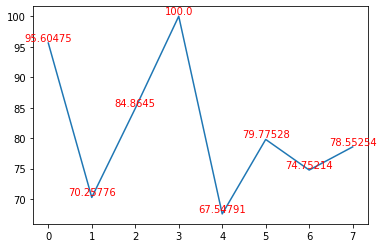

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '닥터지선크림', 'keywords': ['닥터지선크림'], 'data': [{'period': '2021-03-01', 'ratio': 62.07666}, {'period': '2021-03-02', 'ratio': 75.51172}, {'period': '2021-03-03', 'ratio': 81.91291}, {'period': '2021-03-04', 'ratio': 76.92593}, {'period': '2021-03-05', 'ratio': 71.38072}, {'period': '2021-03-06', 'ratio': 69.48269}, {'period': '2021-03-07', 'ratio': 91.2914}, {'period': '2021-03-08', 'ratio': 100}]}]}


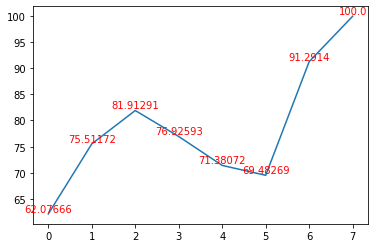

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '피지오겔페이셜크림', 'keywords': ['피지오겔페이셜크림'], 'data': [{'period': '2021-03-01', 'ratio': 51.2039}, {'period': '2021-03-02', 'ratio': 57.39103}, {'period': '2021-03-03', 'ratio': 70.3444}, {'period': '2021-03-04', 'ratio': 48.67418}, {'period': '2021-03-05', 'ratio': 43.18805}, {'period': '2021-03-06', 'ratio': 46.17494}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 64.52301}]}]}


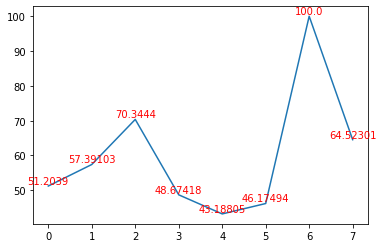

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '피지오겔', 'keywords': ['피지오겔'], 'data': [{'period': '2021-03-01', 'ratio': 84.68727}, {'period': '2021-03-02', 'ratio': 90.76204}, {'period': '2021-03-03', 'ratio': 97.26815}, {'period': '2021-03-04', 'ratio': 90.69015}, {'period': '2021-03-05', 'ratio': 72.8253}, {'period': '2021-03-06', 'ratio': 75.19769}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 86.23292}]}]}


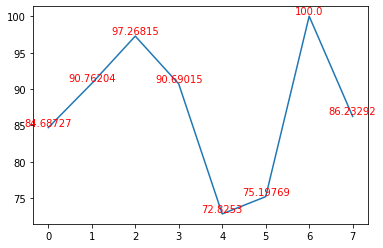

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '헤어에센스', 'keywords': ['헤어에센스'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 91.3879}, {'period': '2021-03-03', 'ratio': 91.20996}, {'period': '2021-03-04', 'ratio': 92.7758}, {'period': '2021-03-05', 'ratio': 78.11387}, {'period': '2021-03-06', 'ratio': 86.01423}, {'period': '2021-03-07', 'ratio': 98.68327}, {'period': '2021-03-08', 'ratio': 92.70462}]}]}


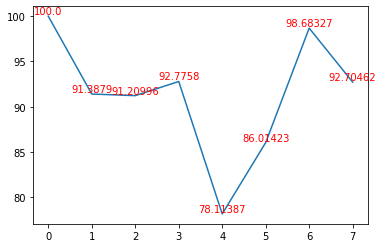

{'startDate': '2021-03-01', 'endDate': '2021-03-08', 'timeUnit': 'date', 'results': [{'title': '선크림', 'keywords': ['선크림'], 'data': [{'period': '2021-03-01', 'ratio': 81.88458}, {'period': '2021-03-02', 'ratio': 84.95252}, {'period': '2021-03-03', 'ratio': 94.81373}, {'period': '2021-03-04', 'ratio': 77.79401}, {'period': '2021-03-05', 'ratio': 81.51935}, {'period': '2021-03-06', 'ratio': 74.57998}, {'period': '2021-03-07', 'ratio': 97.73557}, {'period': '2021-03-08', 'ratio': 100}]}]}


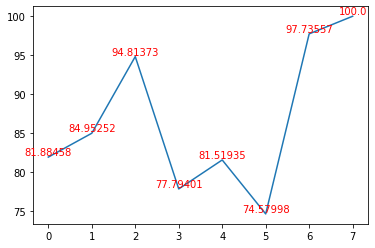

In [63]:
for i in range(1,len(top10.columns)):
    find_top10_ratio(top10.columns[i])